# Khai báo thư viện

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
#------------------------------------------------------------------
from sklearn import preprocessing #has preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
#------------------------------------------------------------------
from scipy.stats import uniform
from scipy.cluster.hierarchy import dendrogram, linkage
#------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
#------------------------------------------------------------------
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
import skfuzzy as fuzz
#------------------------------------------------------------------
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import make_scorer
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
# ------------------------------------------------------------------

# Data

In [2]:
df = pd.read_csv("D:\_Dev\_Group Project\Affinity-Propagation-ML-UEH\Data\Mall Customers\Mall_Customers_preprocessed.csv")
X = df.drop(columns=["customerid"])

In [3]:
data = df.drop(columns=["customerid",],axis=1,)
X = data.copy()

In [4]:
print(f"Mall_Customers_preprocessed")
X.head()

Mall_Customers_preprocessed


,age,annual_income,spending_score,genre_Female
0,-1.424569,-1.738999,-0.434801,0.0
1,-1.281035,-1.738999,1.195704,0.0
2,-1.352802,-1.700830,-1.715913,1.0
3,-1.137502,-1.700830,1.040418,1.0
4,-0.563369,-1.662660,-0.395980,1.0


# Fuzzy C-Means

In [5]:
#Thực hiện Fuzzy C-Means
data = X.values.T  # FCM yêu cầu dạng (features, samples)

In [ ]:
fuzz_clusters = 6 #Số lượng cụm và các chỉ số khác đã được Optimize
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=fuzz_clusters, m=1.5, error=0.005, maxiter=1000, init=None, seed=42)

In [58]:
labels = np.argmax(u, axis=0)
df["cluster_fcm"] = labels

In [59]:
silhouette_fuzz = silhouette_score(X, labels)
davies_bouldin_fuzz = davies_bouldin_score(X, labels)
calinski_harabasz_fuzz = calinski_harabasz_score(X, labels)

In [60]:
print(f"Fuzzy C-Means:")
print(f"- Số lượng cụm: {fuzz_clusters}")
print(f"- Silhouette Score: {silhouette_fuzz:.3f}")
print(f"- Davies Bouldin: {davies_bouldin_fuzz:.3f}")
print(f"- Calinski Harabaz: {calinski_harabasz_fuzz:.3f}")

Fuzzy C-Means:
- Số lượng cụm: 6
- Silhouette Score: 0.357
- Davies Bouldin: 1.010
- Calinski Harabaz: 99.446


In [61]:
#Giảm số chiều về 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

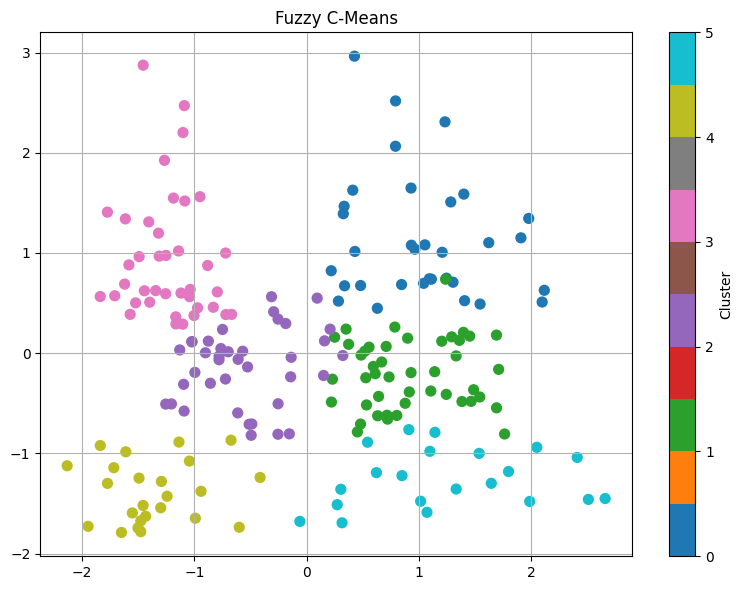

In [62]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=50)
plt.title("Fuzzy C-Means")
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()